# Tools and Techniques used in Gamma Ray Spectroscopy

### Aim
To prepare a prerequisite understanding about Gamma Ray Spectroscopy which will be accessible to everyone. The detectors and different modules used in the following study are very costly and thus may not be accessible for all the students. In the world of online facilities, this step of visualization through programming languages will have a greater reach and thus will be useful to provide better understanding to a beginner.

### Signal Processing Modules to be discussed
1) Preamplifier

2) Shaping Amplifier (CR-RC)

3) Noise Analysis

4) Constant Fraction Discriminator

5) Analog to Digital Converter

In [28]:
# Importing libraries
import numpy as np # for mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting
import random # to choose random numbers
import math # for mathematical functions
from scipy.fft import fft,fftfreq, ifft,rfft,irfft # for fast fourier transform and its tools

### 1) Preamplifier
The major focus will be on High Purity Germanium (HPGe) Detectors. The analytical form of pre-amplifier signal for High Purity Germanium (HPGe) detector is given by Jordanov and co-workers as follows:-
$$V(t)=\frac{1}{\tau-\theta}\left(e^{\left(-\dfrac{t}{\tau}\right)}-e^{\left(-\dfrac{t}{\theta}\right)}\right)$$
where $\theta$ is finite rise time and $\tau$ is decay time 

In [29]:
# Defining function for pre-amplifier signal for HPGe
def pre_amplifier_output_HPGe(t,tau,theta): # t,tau and theta are parameters of function that we can change while calling the function
    # t is time array, tau is decay time and theta is rise time
    V=-(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta) # analytical formula of pre-amplifier signal for HPGe detector
    # The polarity of preamp output signal is generally negative if current pulse will go into the preamp input as they have negative feedback circuit.
    return V

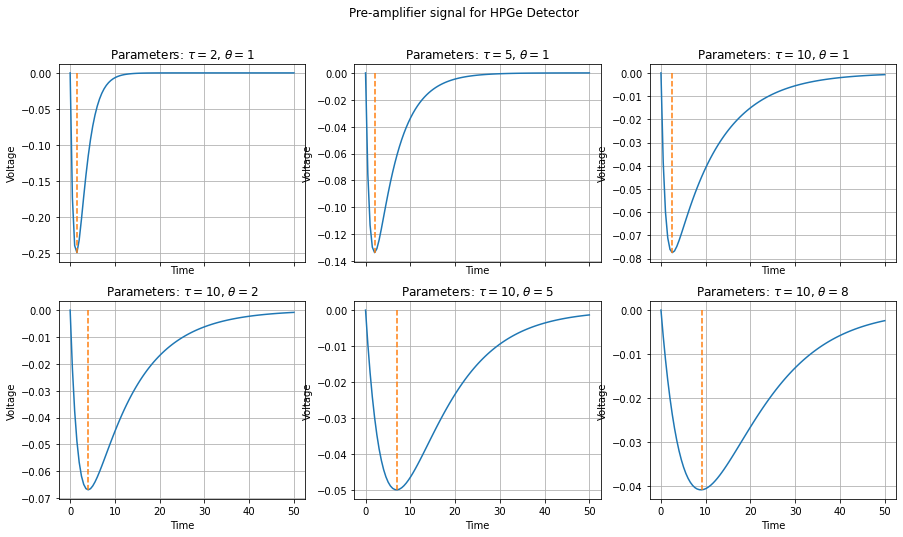

In [30]:
t=np.linspace(0,50,100) 
# t is time array, 1st and 2nd parameter is the interval divided in number of steps(equally spaced) given as 3rd parameter 

# Let's plot the preamp output voltage as function of time with the varying parameters (tau,theta)
# Displayed them as subplots to oberve the variation easily
fig, ax = plt.subplots(2, 3, sharex=True) #to subplot in 2 rows and 3 columns, all subplots are sharing x axis
fig.set_size_inches(15,8) # size of figure (15 by 8 inches)

# calling pre_amplifier_output_HPGe function
V1_preamp=pre_amplifier_output_HPGe(t,2,1) # (tau=2,theta=1)
V2_preamp=pre_amplifier_output_HPGe(t,5,1) # (tau=5,theta=1)
V3_preamp=pre_amplifier_output_HPGe(t,10,1) # (tau=10,theta=1)
V4_preamp=pre_amplifier_output_HPGe(t,10,2) # (tau=10,theta=2)
V5_preamp=pre_amplifier_output_HPGe(t,10,5) # (tau=10,theta=5)
V6_preamp=pre_amplifier_output_HPGe(t,10,8) # (tau=10,theta=8)
# making array of diferent output voltages
V_preamp=np.array([[V1_preamp,V2_preamp,V3_preamp],[V4_preamp,V5_preamp,V6_preamp]])

# adding super title and individual titles for subplots
fig.suptitle("Pre-amplifier signal for HPGe Detector")
ax[0, 0].set_title(r'Parameters: $\tau=2$, $\theta=1$')
ax[0, 1].set_title(r'Parameters: $\tau=5$, $\theta=1$')
ax[0, 2].set_title(r'Parameters: $\tau=10$, $\theta=1$')
ax[1, 0].set_title(r'Parameters: $\tau=10$, $\theta=2$')
ax[1, 1].set_title(r'Parameters: $\tau=10$, $\theta=5$')
ax[1, 2].set_title(r'Parameters: $\tau=10$, $\theta=8$')

# plotting vertical line passing from minima (for better comparison)

# Loop to run command in all subplots
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].plot(t,V_preamp[i][j]) # plotting output voltage vs time
        # Next 4 lines are to plot a vertical line corresponding to minimum voltage
        min_V_index=np.where(V_preamp[i][j]==min(V_preamp[i][j]))[0][0]
        y=np.linspace(0,min(V_preamp[i][j]),10)
        x=np.array([t[min_V_index]]*10)
        ax[i][j].plot(x,y,linestyle='dashed')
        ax[i][j].set_xlabel("Time") # labelling the axes
        ax[i][j].set_ylabel("Voltage")
        ax[i][j].grid() # adding gridlines
plt.show()

In above plots, we can easily observe the variation of decay time rowwise and the variation of rise time columnwise

### 2) Pulse Shaping Amplifier

#### Low pass filter (Frequency Response)
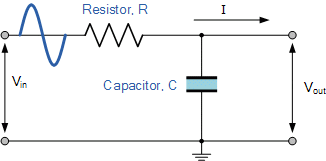
Let's consider low pass filter with passive component like RC circuit which don't amplify the signal. In low pass filter, output is taken across capacitor.
Output voltage is given by:-
$$V_o=\frac{X_C}{Z}V_{in}=\frac{X_C}{\sqrt{R^2+X_C^2}}V_{in}$$
where $X_C$ is Capacitive reactance and R is resistance
$$X_C=\frac{1}{\omega C}=\frac{1}{2\pi f C}$$
where $f$ is frequency and $C$ is Capacitance

#### High pass filter (Frequency Response)
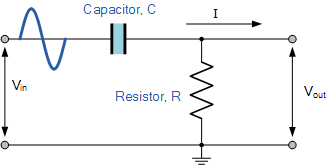
Let's consider high pass filter with passive component like RC circuit which don't amplify the signal. In high pass filter, output is taken across resistor.
Output voltage is given by:-
$$V_o=\frac{R}{Z}V_{in}=\frac{R}{\sqrt{R^2+X_C^2}}V_{in}$$
where $X_C$ is Capacitive reactance and R is resistance
$$X_C=\frac{1}{\omega C}=\frac{1}{2\pi f C}$$
where $f$ is frequency and $C$ is Capacitance

In [31]:
#Let's define function for low pass filter
def low_pass_filter_f(Vi,f,R,C): # Vi is input voltage, f is frequency, R is resistance and C is capacitance
    Xc=1/(2*np.pi*f*C)
    Vo=Xc*Vi/(np.sqrt(R**2+Xc**2)) # Output voltage for low pass filter
    return Vo

#Let's define function for high pass filter
def high_pass_filter_f(Vi,f,R,C): # Vi is input voltage, f is frequency, R is resistance and C is capacitance
    Xc=1/(2*np.pi*f*C)
    Vo=R*Vi/(np.sqrt(R**2+Xc**2)) # Output voltage for high pass filter
    return Vo

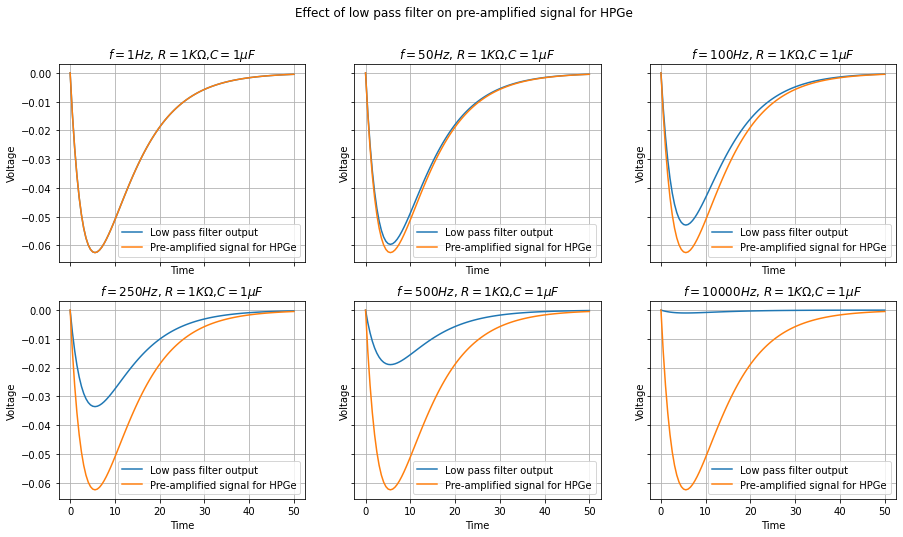

In [32]:
# Choosing resistance and capacitance
R=10**3 # kilo ohms
C=10**(-6) # micro farads
# Let's take voltage signal from HPGe Detector
tau=4
theta=8
V_pre_amplified_HPGe=pre_amplifier_output_HPGe(t,tau,theta)

# For Low pass filter
# Let's plot output voltage vs time for different frequencies and display them as subplots to oberve the variation easily
fig, ax = plt.subplots(2, 3, sharex=True,sharey=True) #to subplot in 2 rows and 3 columns, all subplots are sharing x and y axis
fig.set_size_inches(15,8) # size of figure (15 by 8 inches)

# individual commands for subplotting with different frequency parameters
# Calling low_pass_filter_f function
ax[0][0].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,1,R,C),label='Low pass filter output') # f=1Hz
ax[0][1].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,50,R,C),label='Low pass filter output') # f=50Hz
ax[0][2].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,100,R,C),label='Low pass filter output') # f=100Hz
ax[1][0].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,250,R,C),label='Low pass filter output') # f=250Hz
ax[1][1].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,500,R,C),label='Low pass filter output') # f=500Hz
ax[1][2].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,10000,R,C),label='Low pass filter output') # f=10 KHz

# adding super title and individual titles for subplots
fig.suptitle("Effect of low pass filter on pre-amplified signal for HPGe")
ax[0, 0].set_title(r'$f=1 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[0, 1].set_title(r'$f=50 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[0, 2].set_title(r'$f=100 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 0].set_title(r'$f=250 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 1].set_title(r'$f=500 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 2].set_title(r'$f=10000 Hz$, $R=1 K\Omega$,$C=1\mu F$')

# Loop to add gridlines and label axes in all subplots
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].plot(t,V_pre_amplified_HPGe,label='Pre-amplified signal for HPGe')
        ax[i][j].set_xlabel("Time")
        ax[i][j].set_ylabel("Voltage")
        ax[i][j].legend()
        ax[i][j].grid()
plt.show()

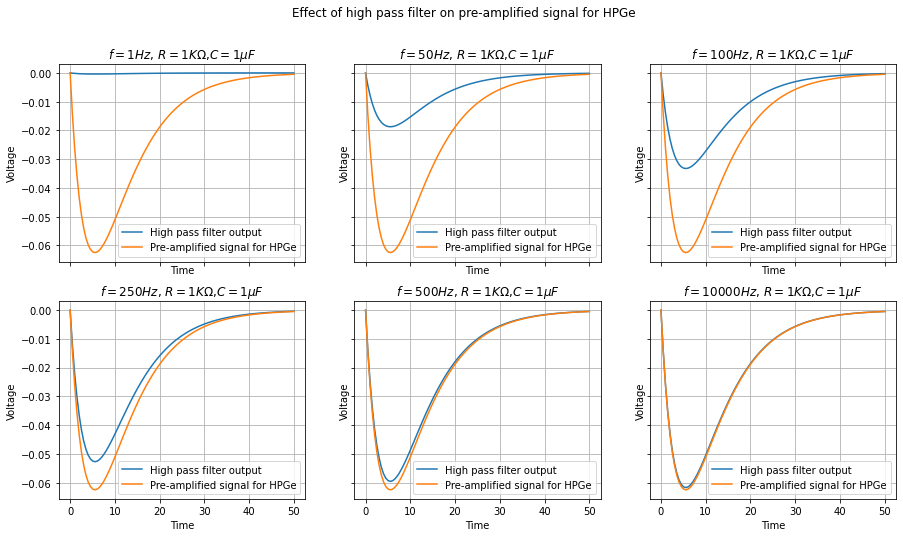

In [33]:
# For High pass filter
# Let's plot output voltage vs time for different frequencies and display them as subplots to oberve the variation easily
fig, ax = plt.subplots(2, 3, sharex=True,sharey=True) #to subplot in 2 rows and 3 columns, all subplots are sharing x and y axis
fig.set_size_inches(15,8) # size of figure (15 by 8 inches)

# individual commands for subplotting with different frequency parameters
# Calling high_pass_filter_f function
ax[0][0].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,1,R,C),label='High pass filter output') # f=1Hz
ax[0][1].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,50,R,C),label='High pass filter output') # f=50Hz
ax[0][2].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,100,R,C),label='High pass filter output') # f=100Hz
ax[1][0].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,250,R,C),label='High pass filter output') # f=250Hz
ax[1][1].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,500,R,C),label='High pass filter output') # f=500Hz
ax[1][2].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,1000,R,C),label='High pass filter output') # f=1000 Hz

# adding super title and individual titles for subplots
fig.suptitle("Effect of high pass filter on pre-amplified signal for HPGe")
ax[0, 0].set_title(r'$f=1 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[0, 1].set_title(r'$f=50 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[0, 2].set_title(r'$f=100 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 0].set_title(r'$f=250 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 1].set_title(r'$f=500 Hz$, $R=1 K\Omega$,$C=1\mu F$')
ax[1, 2].set_title(r'$f=10000 Hz$, $R=1 K\Omega$,$C=1\mu F$')

# Loop to add gridlines and label axes in all subplots
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].plot(t,V_pre_amplified_HPGe,label='Pre-amplified signal for HPGe')
        ax[i][j].set_xlabel("Time")
        ax[i][j].set_ylabel("Voltage")
        ax[i][j].legend()
        ax[i][j].grid()
plt.show()

#### Low Pass Filter (Time Domain)

$$\boxed{V_{out}(t'=t)=\frac{e^{-t/\tau}}{\tau}\int_{t'=0}^{t'=t}V_{in}(t')e^{t'/\tau}dt'}$$
where $\tau=RC$ is decay time 
##### For step pulse, $V_{in}$ will be constant and the expression will be reduced to:-
$$\boxed{V_{out}=V_{in}(1-e^{-t/\tau})}$$

#### High Pass Filter (Time Domain)

$$\boxed{V_{out}(t'=t)=\left(e^{-t/\tau}\int_{t'=0}^{t'=t}\frac{dV_{in}(t')}{dt'}e^{t'/\tau}dt'\right)+V_{in}(t'=0)e^{-t/\tau}}$$
where $\tau=RC$ is decay time
##### For step pulse, $V_{in}$ will be constant and the expression will be reduced to:-
$$\boxed{V_{out}=V_{in}e^{-t/\tau}}$$

We can calculate the output of low and high pass filters for any general input pulse by using numerical integration and differentiation. 
### Numerical Integration
For numerical integration, there are different methods. I will be using Composite simpson 1/3 method for the same.

#### Simpson 1/3 Rule
In Simpson 1/3rd method, we approximate the function to be integrated as 2nd order polynomial (parabola) using Newton's divided difference polynomial
$$f_2(x)=b_0+b_1(x-a)+b_2(x-a)\left(x-\left(\frac{a+b}{2}\right)\right)$$
where
$$b_0=f(a)$$

$$b_1=\frac{f\left(\frac{a+b}{2}\right)-f(a)}{\left(\frac{a+b}{2}\right)-a}$$

$$b_2=\frac{\left[\dfrac{f(b)-f\left(\dfrac{a+b}{2}\right)}{b-\left(\dfrac{a+b}{2}\right)}\right]-\left[\dfrac{f\left(\dfrac{a+b}{2}\right)-f(a)}{\left(\dfrac{a+b}{2}\right)-a}\right]}{b-a}$$

$$\begin{align}
\int_a^b f(x)dx &\approx\int_a^b f_2(x)dx\\
&=\int_a^b \left(b_0+b_1(x-a)+b_2(x-a)\left(x-\left(\frac{a+b}{2}\right)\right)\right)dx \\
&=\left[b_0x+b_1\left(\frac{x^2}{2}-ax\right)+b_2\left(\frac{x^3}{3}-\frac{(3a+b)x^2}{4}+\frac{a(a+b)x}{2}\right)\right]_a^b \\
&=b_0(b-a)+b_1\left(\frac{b^2-a^2}{2}-a(b-a)\right)+b_2\left(\frac{b^3-a^3}{3}-\frac{(3a+b)(b^2-a^2)}{4}+\frac{a(a+b)(b-a)}{2}\right)
\end{align}$$

Substituting values of $b_0$, $b_1$ and $b_2$, we will get
$$\begin{align}\int_a^b f(x)dx &\approx \frac{(b-a)}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right] \\
&=\frac{h}{3}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]\end{align}$$

#### Composite simpson 1/3 Rule
$$\begin{align}I&=\int_{x_0}^{x_n}f_n(x)dx\\
&=\int_{x_0}^{x_2}f_n(x)dx+\int_{x_2}^{x_4}f_n(x)dx+......+\int_{x_{n-2}}^{x_n}f_n(x)dx\\
&=\frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]+\frac{h}{3}[f(x_2)+4f(x_3)+f(x_4)]+......\frac{h}{3}[f(x_{n-2})+4f(x_{n-1})+f(x_n)]\\
&=\frac{h}{3}\left[f(x_0)+4\sum_{i=1\\ i,odd}^{n-1}f(x_i)+2\sum_{j=2\\ j,even}^{n-2}f(x_j)+f(x_n)\right]\end{align}$$

In [34]:
# Defining integration function
def integrate(integrand_values,ti):
    #integrand_values is array of values of integrand at the points in which interval is divided
    # ti is the time arrays over which integration will be done, ti is t' mentioned in formula for output voltage
    a=ti[0] # lower limit of integration
    b=ti[-1] # upper limit of integration
    n=len(ti)-1 # number of steps in which interval (a,b) is divided
    sum_even=0 # initializing the summations
    sum_odd=0
    # Below loop will calculate the odd and even summations mentioned in Simpson 1/3 rule
    for i in range(1,n):
        if i%2==0:
            sum_even+=integrand_values[i]
        else:
            sum_odd+=integrand_values[i]
            
    if a==b:
        I=0 # If lower and upper limit are equal, integration will be 0
    else:
        I=(b-a)*(integrand_values[0]+4*sum_odd+2*sum_even+integrand_values[-1])/(3*n) #Composite Simpson 1/3 rule
    return I

### Numerical Differentiation
I will be using Central Difference Scheme along with forward and backward difference scheme for boundary points.

Using Taylor Series
$$f(t+\Delta t)=f(t)+\Delta t \frac{\delta f}{\delta t}+\frac{\Delta t^2}{2!} \frac{\delta^2 f}{\delta t^2}+....$$
$$f(t-\Delta t)=f(t)-\Delta t \frac{\delta f}{\delta t}+\frac{\Delta t^2}{2!} \frac{\delta^2 f}{\delta t^2}+....$$
Neglecting higher order terms
$$f(t+\Delta t)=f(t)+\Delta t \frac{\delta f}{\delta t}$$
$$f(t-\Delta t)=f(t)-\Delta t \frac{\delta f}{\delta t}$$
Subtracting these equations, we will get 
#### Central Difference Formula
$$\frac{df}{dt}=\frac{f(t+\Delta t)-f(t-\Delta t)}{2\Delta t}$$
#### Forward Difference Formula
$$\frac{df}{dt}=\frac{f(t+\Delta t)-f(t)}{\Delta t}$$
#### Backward Difference Formula
$$\frac{df}{dt}=\frac{f(t)-f(t-\Delta t)}{\Delta t}$$

In [35]:
# Defining differentiation function
# Let's keep the interval, step size and number of points in which interval is divided same for integration and differentiation
def differentiate(differentiable_arr,ti):
    # ti is time array which is divided into equal steps for integration/differentiation
    # differentiable_arr is the array that needs to be differentiated
    dif=[] # creating the empty list to store values after differentiation
    
    # upper limit of integration is variable, so when ti will contain only 1 element, we can declare differentiation output as 0
    # Any how if lower and upper limit of integration will be same, integration output will be 0
    if len(ti)==1:
        dif.append(0)
        dif=dif*len(ti)
    else:
        for i in range(len(ti)):
            h=ti[1]-ti[0] # step size
            if i==0:
                dif.append((differentiable_arr[i+1]-differentiable_arr[i])/h) # Forward Difference Rule
            elif ((i!=0) and (i!=len(ti)-1)):
                #print(i)
                dif.append((differentiable_arr[i+1]-differentiable_arr[i-1])/(2*h)) # Central Difference Rule
            else:
                dif.append((differentiable_arr[i]-differentiable_arr[i-1])/h) # Backward Difference Rule
    dif=np.array(dif) # converting list into array
    return dif

In [36]:
#Below function will give the low pass filter output voltage array
def low_pass_filter(V_at_T,T): # T is time array, V_at_T is input voltage array at these time T
    flag=0
    t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
    # Note upper limit of integration is variable
    # This time array t1 is collection of all upper limits
    # n_i are number of steps in which time interval is divided for integration
    integrated_arr=[]
    for i in range(len(t1)):
        ti=T[0:flag+i+1] #We are taking time values from 0 to the upper limit of integration which is variable
        V_at_ti=V_at_T[0:flag+i+1] # Input voltage array corresponding to ti
        flag+=n_i-1 # flag helps in proper indexing to jump (n_i-1) steps with each cycle
        integrand_values=V_at_ti*np.exp(ti/tau) # integrand values at points in which interval is divided
        integrated_arr.append(integrate(integrand_values,ti)) # calling integrate function
    integrated_arr=np.array(integrated_arr) 
    Vo=np.exp(-t1/tau)*integrated_arr/tau #  low pass filter output formula
    return Vo

In [37]:
#Below function will give the high pass filter output voltage array
def high_pass_filter(V_at_T,T): # T is time array, V_at_T is input voltage array at these time T
    flag=0
    t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
    # Note upper limit of integration is variable
    # This time array t1 is collection of all upper limits
    # n_i are number of steps in which time interval is divided for integration
    integrated_arr=[]
    for i in range(len(t1)):
        ti=T[0:flag+i+1] #We are taking time values from 0 to the upper limit of integration which is variable
        V_at_ti=V_at_T[0:flag+i+1] # Input voltage array corresponding to ti
        flag+=n_i-1 # flag helps in proper indexing to jump (n_i-1) steps with each cycle
        differentiated_arr=differentiate(V_at_ti,ti) # calling differentiate function
        integrand_values=differentiated_arr*np.exp(ti/tau) # integrand values at points in which interval is divided
        integrated_arr.append(integrate(integrand_values,ti)) # calling integrate function
    integrated_arr=np.array(integrated_arr) 
    Vo=np.exp(-t1/tau)*(integrated_arr+V_at_ti[0]) #  high pass filter output formula
    return Vo

In [38]:
# For step/constant pulse
def Vi(t_): # t_ is time array at which input voltage needs to be calculated
    V_amp=1 # Amplitude
    v=[]
    for i in range(len(t_)):
        v.append(V_amp)
    v=np.array(v) # Voltage array correspoding to t_ array
    return v

In [39]:
# Below is the main code to initiate and calculate output voltages
n_i=10 # number of steps in which time interval is divided for integration
n_o=20 # (number of elements in output array)-1
N=1+n_o*n_i # number of steps in which main time array is divided
T=np.linspace(0,50,N) # main time array
t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
tau=10 # decay time
V_at_T=Vi(T) # Input voltage corresponding to T array
V_at_t1=Vi(t1) # Input voltage corresponding to t1 array

# Low pass filter
Vo_lowpass=low_pass_filter(V_at_T,T) # calling low_pass_filter function
Vi_amp=1 # Amplitude of step pulse
Vo_low_step=Vi_amp*(1-np.exp(-t1/tau)) # analytical formula for low pass filter output having constant input pulse
# We will cross check our result for constant/step input pulse using the analytical formula

# High pass filter
Vo_highpass=high_pass_filter(V_at_T,T) # calling high_pass_filter function
Vo_high_step=Vi_amp*(np.exp(-t1/tau)) # analytical formula for high pass filter output having constant input pulse
# We will cross check our result for constant/step input pulse

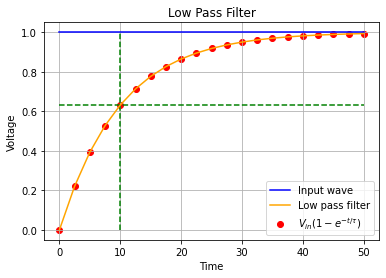

In [40]:
# Plotting low pass filter output
# We know that at t=tau, output for low pass filter for constant input pulse becomes 63%
# Let's verify this by drawing the horizontal and vertical lines for visualization across these points

# For vertical line corresponding to t=tau
y1=np.linspace(0,Vi_amp,10)
x1=[]
for i in range(len(y1)):
    x1.append(tau)
x1=np.array(x1)
# For horizontal line corresponding to V=0.63*V_max
x2=t1 # time array at which output voltage is calculated
y2=[]
for i in range(len(x2)):
    y2.append(Vi_amp*0.63)
y2=np.array(y2)

# Plotting and labelling
plt.plot(x1,y1,linestyle='dashed',color='green') # plotting required vertical line
plt.plot(x2,y2,linestyle='dashed',color='green') # plotting required horizontal line
plt.plot(t1,V_at_t1,label='Input wave',color='blue') # plotting time vs input voltage signal
plt.plot(t1,Vo_lowpass,label='Low pass filter',color='orange') # plotting time vs low pass filter output voltage
plt.scatter(t1,Vo_low_step,label=r'$V_{in}(1-e^{-t/\tau})$',color='red') # plotting time vs analytical formula for constant input pulse to cross check our result
plt.legend() # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title("Low Pass Filter")
plt.grid() # to add gridlines
plt.show()

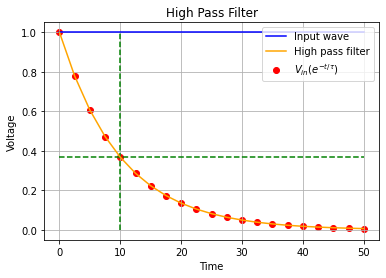

In [41]:
# Plotting high pass filter output
# We know that at t=tau, output for high pass filter for constant input pulse becomes 37%
# Let's verify this by drawing the horizontal and vertical lines for visualization across these points

# For vertical line corresponding to t=tau
y1=np.linspace(0,1,10)
x1=[]
for i in range(len(y1)):
    x1.append(tau)
x1=np.array(x1)
# For horizontal line corresponding to V=0.37*V_max
x2=t1 # time array at which output voltage is calculated
y2=[]
for i in range(len(x2)):
    y2.append(Vi_amp*0.37)
y2=np.array(y2)

# Plotting and labelling
plt.plot(x1,y1,linestyle='dashed',color='green') # plotting required vertical line
plt.plot(x2,y2,linestyle='dashed',color='green') # plotting required horizontal line
plt.plot(t1,V_at_t1,label='Input wave',color='blue') # plotting time vs input voltage signal
plt.plot(t1,Vo_highpass,label='High pass filter',color='orange') # plotting time vs high pass filter output voltage
plt.scatter(t1,Vo_high_step,label=r'$V_{in}(e^{-t/\tau})$',color='red') # plotting time vs analytical formula for constant input pulse to cross check our result
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title("High Pass Filter")
plt.grid() # to add gridlines
plt.show()

In [42]:
# Defining a function for CR-(RC)^n pulse shaping
def CR_RC_n(n): # n is number of RC circuits (low pass filter) followed by CR network (high pass filter)
    V_at_T=Vi(T) # Calling input voltage function
    #print('T',len(T))
    V_at_t=high_pass_filter(V_at_T,T) # output of CR
    t=T
    for i in range(n):
        t=t[0:len(t):n_i] # time array at which output voltage will be calculated after each RC network
        V_at_t=low_pass_filter(V_at_t,t) # calling low pass filter n times
    return V_at_t # Output of CR-(RC)^n

In [43]:
# Let's plot output corresponding to different powers of CR-(RC)^n filter
CR_RC_n_arr=[] # creating empty arrays
t_arr=[]
# For n=1 and n=even values
for i in range(0,8,2): # n=even
    if i==0:
        n=1
    else:
        n=i
    n_o=30 # (number of elements in output array)-1
    n1=n+1 # Number of times main time array T will be divided
    n_i=2 # Number of minimum steps of integration/differentiation
    N=1+n_o*(n_i)**n1 # (Number of elements in main time array T)-1
    T=np.linspace(0,150,N) # Main time array
    CR_RC_n_arr.append(CR_RC_n(n)) # calling CR_RC_n function
    t=T
    for j in range(n1):
        t=t[0:len(t):n_i] # time array at which output voltages are calculated after each RC network
    t_arr.append(t) # storing time array at which output voltages are calculated after each CR-(RC)^n network

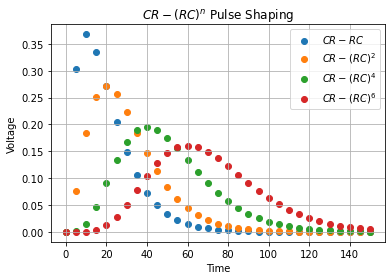

In [44]:
# Plotting and labelling
plt.scatter(t_arr[0],CR_RC_n_arr[0],label=r'$CR-RC$') # CR-(RC)^1
plt.scatter(t_arr[1],CR_RC_n_arr[1],label=r'$CR-(RC)^2$') # CR-(RC)^2
plt.scatter(t_arr[2],CR_RC_n_arr[2],label=r'$CR-(RC)^4$') # CR-(RC)^4
plt.scatter(t_arr[3],CR_RC_n_arr[3],label=r'$CR-(RC)^6$') # CR-(RC)^6
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title(r'$CR-(RC)^n$ Pulse Shaping')
plt.grid() # to add gridlines
plt.show()

In [45]:
# Defining function for pre-amplifier signal for HPGe
def Vi(t_): # t_ is time array
    tau=2 # decay time
    theta=1 # rise time
    V=(np.exp(-t_/tau)-np.exp(-t_/theta))/(tau-theta)
    return V

In [46]:
# Let's apply CR-(RC)^n pulse shaping to the pre-amplifier signal for HPGe detector
CR_RC_n_arr=[] # creating empty arrays
t_arr=[]
# For n=1 and n=even values
for i in range(0,4,2): # n=even
    if i==0:
        n=1
    else:
        n=i
    n_o=40 # (number of elements in output array)-1
    n1=n+1 # Number of times main time array T will be divided
    n_i=5 # Number of minimum steps of integration/differentiation
    N=1+n_o*(n_i)**n1 # (Number of elements in main time array T)-1
    T=np.linspace(0,60,N) # Main time array
    CR_RC_n_arr.append(CR_RC_n(n)) # calling CR_RC_n function
    t=T
    for j in range(n1):
        t=t[0:len(t):n_i] # time array at which output voltages are calculated after each RC network
    t_arr.append(t) # storing time array at which output voltages are calculated after each CR-(RC)^n network

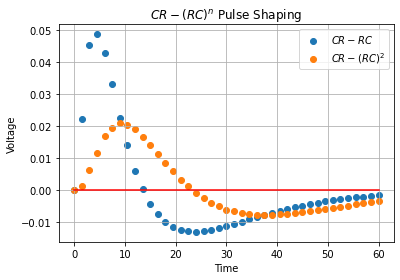

In [62]:
# add x axis at y=0
x=t_arr[0]
y=np.array([0]*len(x))
# Plotting and labelling
plt.scatter(t_arr[0],CR_RC_n_arr[0],label=r'$CR-RC$')
plt.scatter(t_arr[1],CR_RC_n_arr[1],label=r'$CR-(RC)^2$')
plt.plot(x,y,color='red')
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title(r'$CR-(RC)^n$ Pulse Shaping')
plt.grid() # to add gridlines
plt.show()

We can clearly observe the undershoot in the above plot

### 3) Noise Analysis

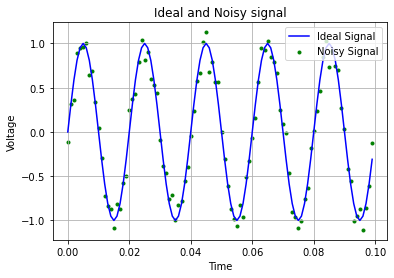

In [48]:
# Number of sample points
N = 100
# sample spacing
T = 1/1000
t=np.linspace(0,N*T,N,endpoint=False) # time array
V_without_noise=np.sin(50*2*np.pi*t) # signal without noise
# Let's define random normal noise
mu=0
sigma=0.1
V_noise=np.random.normal(mu,sigma,len(t))
# Noisy signal
V_with_noise=V_without_noise+V_noise
# Plotting and labelling
plt.plot(t,V_without_noise,label='Ideal Signal',color='blue')
plt.scatter(t,V_with_noise,label='Noisy Signal',color='green',marker='.')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Ideal and Noisy signal')
plt.legend(loc='upper right')
plt.grid()
plt.show()

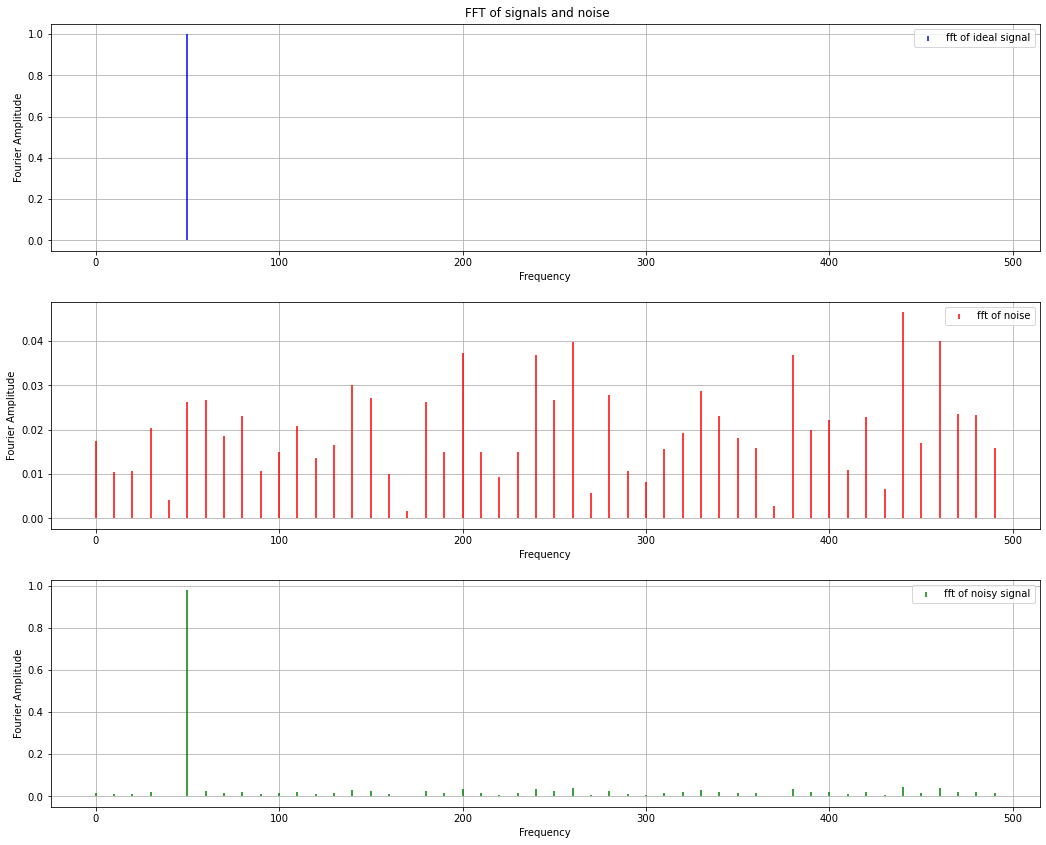

In [49]:
# Let's observe the signal in frequency domain by using fast fourier transform
f=fftfreq(N, T)[0:N//2] # Frequency
# Let's take fft of ideal signal,noise, noisy signal
Vf=rfft(V_without_noise)
nf=rfft(V_noise)
Vnf=rfft(V_with_noise)
# plotting and labelling the subplots
fig, ax = plt.subplots(3)
fig.set_size_inches(15,12) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
plt.suptitle('FFT of signals and noise')
ax[0].stem(f,2.0/N * np.abs(Vf[0:-1]),label='fft of ideal signal', markerfmt=" ",basefmt=" ",linefmt='blue')
ax[1].stem(f,2.0/N * np.abs(nf[0:-1]),label='fft of noise', markerfmt=" ",basefmt=" ",linefmt='red')
ax[2].stem(f,2.0/N * np.abs(Vnf[0:-1]),label='fft of noisy signal', markerfmt=" ",basefmt=" ",linefmt='green')
for i in range(3):
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel('Fourier Amplitude')
    ax[i].legend(loc='upper right')
    ax[i].grid()
plt.show()

In above plots, we can clearly observe that higher and lower frequencies don't contain the signal and only adds to noise. Thus, by using bandpass filters, we restrict our frequency range near the signal to reduce the noise.

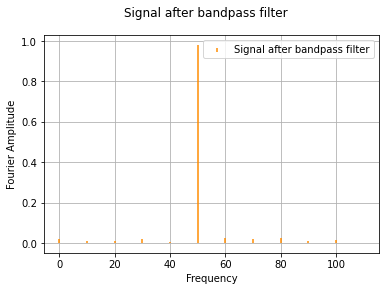

In [50]:
# Let's restrict our frequency to a particular range near the signal
# We will show that by doing so, noise will be reduced

f_l=0 # Lowest freq to pass
f_u=100 # Highest freq to pass
Vnf_bp=[] # creating empty arrays
for i in range(len(f)):
    if f_l<=abs(f[i])<=f_u:
        Vnf_bp.append(Vnf[i]) # Storing signal within the frequency band
    else:
        Vnf_bp.append(0)        
Vnf_bp=np.array(Vnf_bp)
# plotting and labelling
plt.suptitle('Signal after bandpass filter')
plt.stem(f[:N//8],2.0/N * np.abs(Vnf_bp[:N//8]),label='Signal after bandpass filter', markerfmt=" ",basefmt=" ",linefmt='darkorange')
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

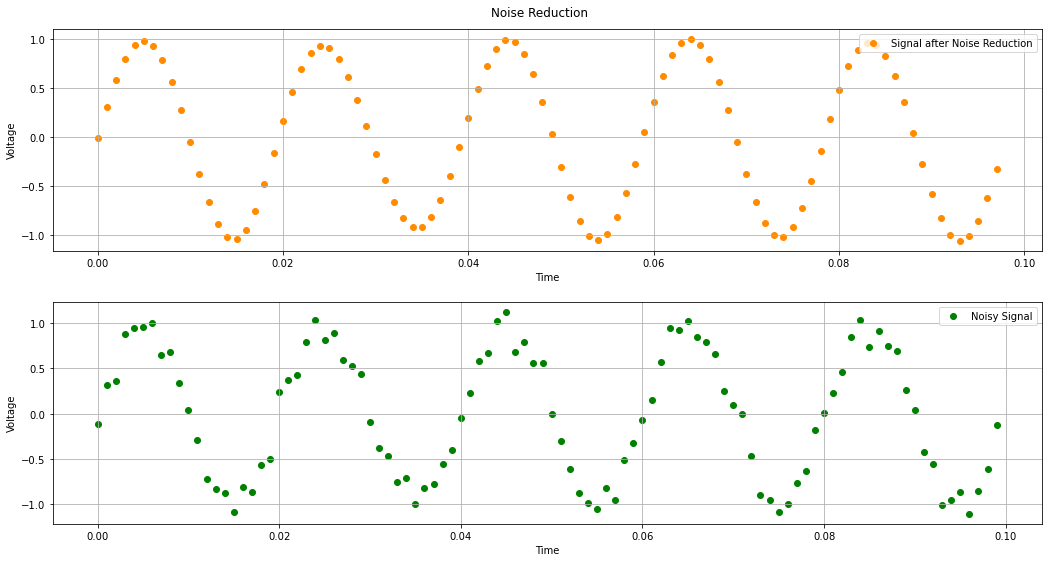

In [51]:
# Let's plot in time domain
Vn_bp=irfft(Vnf_bp) # inverse fft
#Plotting and labelling
fig, ax = plt.subplots(2)
fig.set_size_inches(15,8) # size of figure
fig.tight_layout(pad=3) # spacing between subplots
plt.suptitle('Noise Reduction') # Super title
ax[0].scatter(t[:-2],Vn_bp,label='Signal after Noise Reduction',color='darkorange')
ax[1].scatter(t,V_with_noise,label='Noisy Signal',color='green')
for i in range(2):
    ax[i].set_xlabel('Time') # labelling axes
    ax[i].set_ylabel('Voltage')
    ax[i].legend(loc='upper right')
    ax[i].grid()
plt.show()

### 4) Constant Fraction Discriminator

In [52]:
# Let's take 2 signals with different amplitudes
ts1=0 # time of arrival for signal 1 
ts2=0 # time of arrival for signal 2
t=np.linspace(0,65,100) # time for which signal remains
# time window in which signal is plotted with reference to start time
t1=ts1+t
t2=ts2+t
# Let's use preamplified signal formula for HPGe Detector
tau=8
theta=7
V_CFD1=(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta)
V_CFD2=2*(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta)

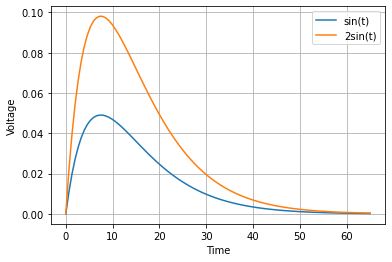

In [53]:
# Plotting and labelling
plt.plot(t1,V_CFD1,label='sin(t)')
plt.plot(t2,V_CFD2,label='2sin(t)')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend(loc='upper right')
plt.grid()
plt.show()

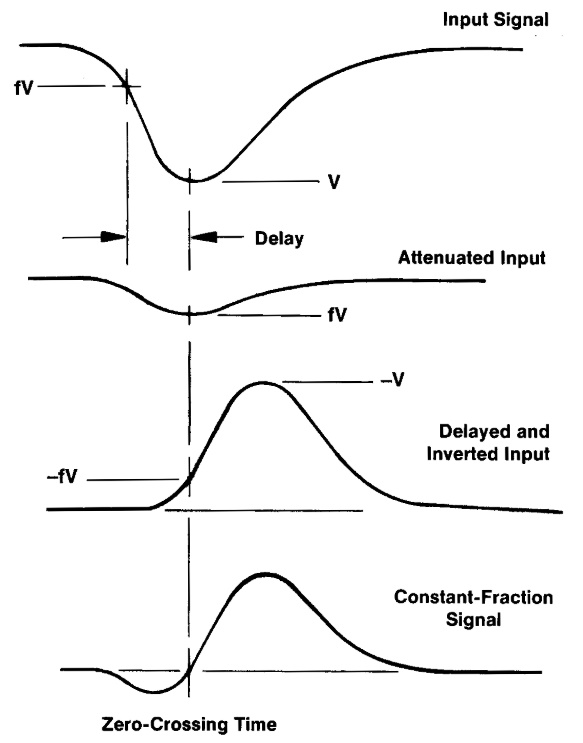

In [54]:
# Let's form the constant fraction signal
Attenuate_factor=0.2
V_CFD1_attenuated=Attenuate_factor*V_CFD1
V_CFD1_reversed=-V_CFD1
V_CFD2_attenuated=Attenuate_factor*V_CFD2
V_CFD2_reversed=-V_CFD2
# Delay time with reference to starting time
t_delay=50
# Delay time with reference to t=0 (positional)
t1_delay=ts1+t_delay
t2_delay=ts2+t_delay
# Time axis with respect to positional delay time 
t1_delayed=t1+t1_delay
t2_delayed=t2+t2_delay
# Time axis from t=0 to positional delay time
t1_d=np.linspace(ts1,t1_delay,100,endpoint=False)
t2_d=np.linspace(ts2,t2_delay,100,endpoint=False)
# Total time axis = time axis before positional time delay + time axis after positional time delay
t1_new=np.concatenate((t1_d,t1_delayed),axis=0)
t2_new=np.concatenate((t2_d,t2_delayed),axis=0)

# Similarly, we need to extent voltage arrays for this total time
v=np.zeros(100)
# For signal 1
V_CFD1_reversed_delayed=np.concatenate((v,V_CFD1_reversed),axis=0) #backward extention for reversed and delayed pulse
V_CFD1_attenuated_extended=np.concatenate((V_CFD1_attenuated,v),axis=0) # forward extention for attenuated pulse
# For signal 2
V_CFD2_reversed_delayed=np.concatenate((v,V_CFD2_reversed),axis=0)
V_CFD2_attenuated_extended=np.concatenate((V_CFD2_attenuated,v),axis=0)
# Total voltage arrays corresponding to the total time
V_CFD1_total=V_CFD1_reversed_delayed+V_CFD1_attenuated_extended
V_CFD2_total=V_CFD2_reversed_delayed+V_CFD2_attenuated_extended

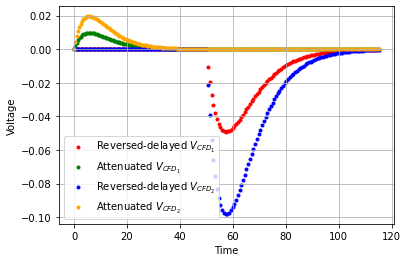

In [55]:
# Plotting and labelling for individual attenuated and reversed-delayed pulse
plt.scatter(t1_new,V_CFD1_reversed_delayed,label=r'Reversed-delayed $V_{CFD_1}$',color='red',marker='.')
plt.scatter(t1_new,V_CFD1_attenuated_extended,label=r'Attenuated $V_{CFD_1}$',color='green',marker='.')
plt.scatter(t2_new,V_CFD2_reversed_delayed,label=r'Reversed-delayed $V_{CFD_2}$',color='blue',marker='.')
plt.scatter(t2_new,V_CFD2_attenuated_extended,label=r'Attenuated $V_{CFD_2}$',color='orange',marker='.')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [56]:
# Let's calculate time at which constant fraction signal crosses zero crossover for both signals
# Form logic pulse for signals using this time of zero crossover

# Finding time at which signal 1 crosses zero crossover
for i in range(len(V_CFD1_total)):
    if i>0:
        if V_CFD1_total[i]*a<=0:
            crossover_index1=i-1
    a=V_CFD1_total[i]
t_crossover1=t1_new[crossover_index1]
print("Time at which signal 1 passes through zero crossover is ",t_crossover1)

# Finding time at which signal 2 crosses zero crossover
for i in range(len(V_CFD2_total)):
    if i>0:
        if V_CFD2_total[i]*a<=0:
            crossover_index2=i-1
    a=V_CFD2_total[i] 
t_crossover2=t2_new[crossover_index2]
print("Time at which signal 2 passes through zero crossover is ",t_crossover2)

# Create logic pulses for signals using this time of zero crossover
t_monoshoot=10 # pulse width
logic_pulse1=[]
logic_pulse2=[]
# For signal 1
for i in range(len(t1_new)):
    if t_crossover1<t1_new[i]<(t_crossover1+t_monoshoot):
        logic_pulse1.append(1)
    else:
        logic_pulse1.append(0)
logic_pulse1=np.array(logic_pulse1)
# For signal 2       
for i in range(len(t2_new)):
    if t_crossover2<t2_new[i]<(t_crossover2+t_monoshoot):
        logic_pulse2.append(1)
    else:
        logic_pulse2.append(0)
logic_pulse2=np.array(logic_pulse2)

Time at which signal 1 passes through zero crossover is  50.0
Time at which signal 2 passes through zero crossover is  50.0


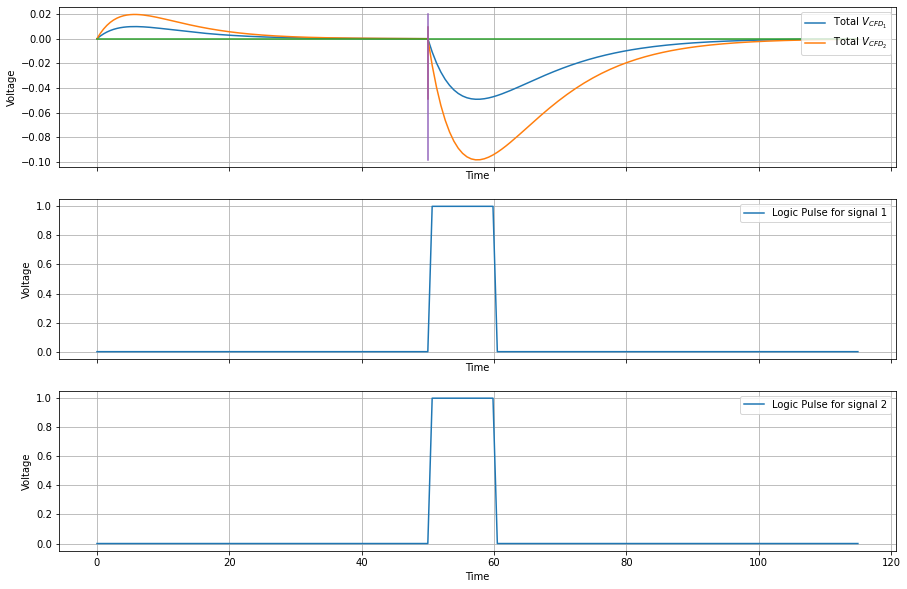

In [57]:
# Let's plot constant fraction signal, logic pulses and t_crossover

# For plotting zero crossover horizontal line
yref=[]
xref=np.linspace(min(t1_new[0],t2_new[0]),max(t1_new[-1],t2_new[-1]),10)
for i in range(len(xref)):
    yref.append(0)
yref=np.array(yref)

# For plotting vertical line corresponding to time at which signal passes through zero crossover
x1=[]
x2=[]
y1=np.linspace(min(V_CFD1_total),max(V_CFD1_total),10)
y2=np.linspace(min(V_CFD2_total),max(V_CFD2_total),10)
for i in range(len(y1)):
    x1.append(t_crossover1) # for signal 1
x1=np.array(x1)
for i in range(len(y2)):
    x2.append(t_crossover2) # for signal 2
x2=np.array(x2)
# Plotting and labelling
fig, ax = plt.subplots(3,sharex=True)
fig.set_size_inches(15,10) # size of figure (15 by 8 inches)
ax[0].plot(t1_new,V_CFD1_total,label=r'Total $V_{CFD_1}$') # Constant Fraction signal 1
ax[0].plot(t2_new,V_CFD2_total,label=r'Total $V_{CFD_2}$') # Constant Fraction signal 2
ax[0].plot(xref,yref) # zero crossover line
ax[0].plot(x1,y1) # t_crossover line for signal 1
ax[0].plot(x2,y2) # t_crossover line for signal 2
ax[1].plot(t1_new,logic_pulse1,label='Logic Pulse for signal 1') # Logic pulses
ax[2].plot(t2_new,logic_pulse2,label='Logic Pulse for signal 2')
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Voltage')
    ax[i].legend(loc='upper right')
    ax[i].grid()
plt.show()

### 5) Analog to Digital Converter

In [58]:
# Let's define a normal analog signal
E_center=3.5 # chosing value at which peak is centered
mu=E_center # mean
sigma=1 # standard deviation
N=1000 # Number of data points
E=np.random.normal(mu,sigma,N) # calling normal function

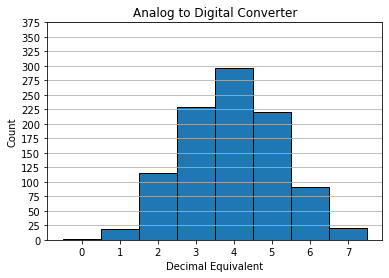

In [59]:
# To convert analog signal into digital, we first chose number of bits and define binsize
n_bits=3
bin_size=(max(E)-min(E))/(2**n_bits) # resolution
# Imagine concentric circles with radius as integral multiple of bin size till E_max
# Concentric circles can be numbered starting from 0
# By dividing energy with bin_size, we can figure out in which concentric circle it lies and we will add that number of concentric circle in a list
# At last, we can count the same numbers appended in the list and plot histogram
E_dist=[]
for i in range(len(E)):
    bin_index=int(E[i]/bin_size) # bin index/numbered region of concentric circles corresponding to each energy value
    E_dist.append(bin_index)
E_dist=np.array(E_dist)
plt.hist(E_dist,bins=[(i-0.5) for i in range(2**n_bits+1)],edgecolor="black") # plotting histogram
# labelling axes and adding title
plt.title('Analog to Digital Converter')
plt.xlabel("Decimal Equivalent")
plt.ylabel("Count")
plt.xticks(range(0,2**n_bits))
plt.yticks(range(0,400,25))
plt.grid(axis='y')
plt.show()